<a href="https://colab.research.google.com/github/rashedalsharqi/cs-167-notes/blob/main/Day14_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day14
## Support Vector Machines (SVM)

#### CS167: Machine Learning, Spring 2023

Tuesday, March 21st, 2023

📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vSvFV5Mz0_YZE1d5r3gQ8IMktE4cBAsJIlP30cl2GhEpSO0J-YWV62QokSDz-OcOCsEmxMuKpY0kVlR/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/cs167_s23_syllabus.html) | 📬 [CodePost Login](https://codepost.io/login)

# Admin Stuff

You should be working on:
- [Project #1](https://classroom.github.com/a/qGx9Wonm) is released today, **Due Thursday, March 23rd, by 11:59pm**.

Grading:
- Quiz #1 scores officially posted.
- Notebooks 2-4 are graded, grades and comments are posted on CodePost.

## Load in some data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
path = 'datasets/IrisData.csv' #'/content/drive/MyDrive/CS167/datasets/IrisData.csv'
iris = pd.read_csv(path)
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Quick Review:

- Scikit Learn
- Project #1 Expectations

# Overview of the Scikit Learn 'Algorithm': 

When working in Scikit Learn (`sklearn`), there is a general pattern that we can follow to implement any supported machine learning algorithm.

It goes like this: 
1. Load your data using `pd.read_csv()`
2. Split your data `train_test_split()`
3. Create your classifier/regressor object
4. Call `fit()` to train your model
5. Call `predict()` to get predictions
6. Call a metric function to measure the performance of your model.

## Models we've talked about so far:

#### k Nearest Neighbors: 
- [`sklearn.neighbors.KNeighborsClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [`sklearn.neighbors.KNeighborsRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
- Relevant Parameters:
    - **weighted k-Nearest-Neighbors**: `weights='distance'`

#### Decision Trees:
- [`sklearn.tree.DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [`sklearn.tree.DecisionTreeRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- Relevant Parameters:
    - `max_depth`, `criterion`, `max_leaf_nodes`

## Models we've talked about so far:

#### Random Forests:
- [`sklearn.ensemble.RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [`sklearn.ensemble.RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForesRegressor.html)
- Relevant Parameters:
    - `n_estimators`, `max_depth`, `criterion`, `max_features`

# PollEverywhere Question:

# Project #1: Choose Your Own Machine Learning Adventure

10% of your final grade

__Due__: Thursday, March 23rd, by 11:59pm

Github Classroom Link: https://classroom.github.com/a/qGx9Wonm

## Learning Objectives:

For this project, you will use the scikit-learn library to conduct a machine learning experiment, and your write-up will ask you to explain what you did and interpret the results. 

This directly addresses two of the course learning objectives stated in the syllabus:
- Students will be able to create software which utilizes machine learning programming libraries in order to conduct machine-learning-based data analysis.
- Students will be able to develop and conduct machine-learning-based data analysis experiments, and they will be able to interpret and explain the results.


## Project Description:

For this project, you are to identify the dataset you would like to utilize. I have provided several examples in class, but you have the option of using any dataset you can find.

You will be assessed on your ability to utilize algorithms and tools introduced in this class. There are some basic guidelines as to what I want to see laid out below, but you are the machine learning engineer and it is your job to draw some meaningful conclusions about the data.

## Dataset Choice:
For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic/Restaurant as they're pretty small) are all fair game (pokemon, wine quality, breast cancer, spotify). I'd recommend choosing a dataset that is interesting to you--it will make the project more fun and engaging.

Here are some other possibilities--[Kaggle](https://www.kaggle.com/datasets) has many many more, as well as the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). It is a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

✨**New**✨: At the very top of your notebook, I'm asking that in a text cell, you **describe how many points you attempted to get from this project**. Tell me what you think you deserve on this notebook given the rubric:

**Self-Evaluation:**

| **Description/Writing** | **I think I deserve** |
|-------------------------|-----------------------|
| 1: Problem              | /2                    |
| 2: Data Prep            | /2                    |
| 3: Research             | /10                   |
| 4: Analysis             | /10                   |
| 5: Bumps in the Road.   | /1                    |
| Total                   | /25                   |

## Project Expectations: ☑️

You will create a Colab notebook that includes your code and results to document your experiment. Most importantly, **you will use text cells in the notebook to explain what you did, interpret the results, and make your recommendations**. 

The written markdown protions must include the following things:

1. **Problem** [2 points]: State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict. Is the problem a regression or a classification? What kind of metric do you plan to use to measure the performance of your model?

2.  **Data Preparation** [2 points]: Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms? 

3.  **Research** [10 points]: Put your code and your experiments here.
    - Your research should include using the models that we've talked about in class so far--namely, a K Nearest Neighbors, weighted kNN, Decision Tree, Random Forest, as well as tuning these models (with visuals, i.e. graphs) to find the parameters that give you the best performance using an appropriate metric.
    - Does normalizing your data lead to better performance? If so, why?

4.  **Analysis** [10 points]: What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

5.  **Bumps in the Road** [1 point]: What challenges did you encounter? How did you overcome these challenges?

## More Details:

For full credit, your experiments should include the following models:
- __k Nearest Neighbors__
- __weighted k Nearest Neighbors__
- __decision tree__
- __random forest__ 

You need to demonstrate the performance of these models on both __normalized__ and __non-normalized__ data. 

For each of the above models, you need to include a __graph of at least 1 tuned parameter__. 

Essentailly, you will be able to fill out this chart with your results:

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |                    |                |                     |
| w-kNN         |                    |                |                     |
| decision tree |                    |                |                     |
| random forest |                    |                |                     |


## Please, cite your sources

If you choose to use code that has not been provided to you in this class, please cite where you got the code from. A simple comment with the URL will suffice. 

This is especially true if you are choosing to use a dataset from Kaggle. There are lots of example notebooks for most Kaggle datasets, and while it's totally fine to look at these, using code from these notebooks without citing where you got it from could result in an academic integretity violation. 


# ✨ New Material

## Dimensionality of Data

__Dimensionality__: the number of attributes that a dataset has

- __High dimensionality__: If the number of attributes (i.e. columns) is higher than the number of observations (i.e. rows) the dimensionality of the data is very high (i.e. *healthcare data*, *gene expression*, 
    - Pros: more data provides more attributes to 'learn' from
    - Cons: more compute time

- __Low dimensionality__: if the number of attributes (i.e. columns) is relatively small compared to the number of rows. (i.e. *Iris Dataset*)
    - Pros: simpler data, less compute time
    - Cons: less likely to be easily separable

## Dimensionality Examples: 

In [ ]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 🔮 Curse of Dimensionality:

The __curse of dimensionality__: the more dimensions you add to a dataset, the more difficult it becomes to make predictions about that dataset. 
- each attribute added results an an _exponenetial decrease in predictive power_. 

# Overview:

The next two lectures, we're going to be playing around with the __dimensionality__ of our datasets. 
- __Support Vector Machines__: increase dimensionality so that our data can be linearly separable
- __Principal Component Analysis__: Decreases the dimensionality of our datasets

# Support Vector Machines:

[Demonstration Slides](https://docs.google.com/presentation/d/1KABBOfWUsOjwGM-B8jFmyUqMwmLtyb5d64oXE4kA5jo/edit?usp=sharing)


## 🙋 PollEverywhere Concept Check

## Support Vector Machines:

Which line is the best separator of the two classes?

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_best_sep.png?raw=1" width=400/>
</div>

Line B has the __largest margin__.
- maximizes the distance to the nearest points of different classes.

# Support Vector Machines:

If two classes are linearly separable, there are many lines that we could choose to separate the classes. Support Vector Machines help us to choose the best line to split classes by. 

In a nutshell: Support Vector Machines find the separator that maximizes the margins.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_max_margins.png?raw=1" width=800/>
</div>

## Maximizing the Margin:

Tbe goal is to __maximize the margin__. Here's what that means:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_margin1.png?raw=1" width=500/>
</div>

## Maximizing the Margin:

Tbe goal is to __maximize the margin__. Here's what that means:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_margin2.png?raw=1" width=500/>
</div>

## Maximizing the Margin:

Tbe goal is to __maximize the margin__. Here's what that means:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_margin3.png?raw=1" width=500/>
</div>

## 🙋 PollEverywhere Concept Check

Which line is the best separator of the two classes?
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_svm2.png?raw=1" width=500/>
</div>

- C is __consistent__ (correctly classifies all training data) and so would be chosen by the SVM.
    - But... maybe B would generalize the data better
    - If you choose to allow your model to have __inconsistencies__, you are using __soft margins__. 

## So what are Support Vectors, anyway?

The decision function (line/plane/hyperplane, etc) is fully specified by a (usually very small) __subset of the training samples__. 

__Support Vectors__ are the points from the training set which would change the position of the dividing hyperplane if removed.
- they are the critical elements of the training set. 

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_svm3.png?raw=1" width=500/>
</div>

## Support Vectors

Moving a support vector moves the decision boundary.

Moving other vectors has no effect on the decision boundary.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_svm4.png?raw=1" width=600/>
</div>

## 🙋 PollEverywhere Concept Check

## Separation by Hyperplanes:

Assume we have some data that is __linearly separable__.
- In 2 dimensions, we can draw a line to separate the data
- In 3 dimensions, that separator becomes a _plane_.
- In more than 3 dimensions, that separator becomes a _hyperplane_.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_hyperplane.png?raw=1" width=800/>
</div>

## 🚨🚨 Terminology Alert 🚨🚨

Okay, so far we've talked about: 
- __Dimensionality of Data__: how many attributes does the dataset have?
- __Linear Separability__: can the data be separated by a line/plane/hyperplane?
- __Support Vectors__: the points that are closest to the decision boundary that are used to define the decision boundary.
- __Hyperplane__: A multidimensional surface that can be used to separate data
- __Margins__: The distance between the separator and the observations closest to the separators (the support vectors).

## Will an SVM Work here?
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_svm5.png?raw=1" width=500/>
</div>

Is this data linearly separable?

# The Kernel Trick Overview:

The kernel trick is what makes SVMs powerful.

__Big Idea__: Map the data into a different feature space wher it becomes separable by a hyperplane.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_kernel.png?raw=1" width=800/>
</div>

# Support Vector Classifier:

The main idea:
- __goal__: find a decision boundary with a _maximum width_ that can correctly classify your data.

Steps:
1. Start by checking whether your data is linearly separable.
    - If so, great. Find the classifier with the maximum margin.
    - If not, go to Step 2.

2. If not, then move the data into a higher dimensional space using the __kernel trick__. 
3. Find the best hyperplane that separates the higher dimensional data. 

# The Kernel Trick:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_kernel1.png?raw=1" width=500/>
</div>

# The Kernel Trick:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_kernel2.png?raw=1" width=500/>
</div>

# The Kernel Trick:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_kernel_4.png?raw=1" width=500/>
</div>

# The Kernel Trick:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_kernel5.png?raw=1" width=500/>
</div>

# The Kernel Trick Overview:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_kernel6.png?raw=1" width=1000/>
</div>

# The Kernel Trick Overview:

The kernel trick is what makes SVMs powerful.

__Big Idea__: Map the data into a different feature space wher it becomes separable by a hyperplane.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_kernel.png?raw=1" width=800/>
</div>

## Kernel Trick Example:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_kernel_ex.png?raw=1" width=1000/>
</div>

# 💬 Group Exercise:

Come up with a new feature that can be used to separate the following two classes:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day14_ex1.png?raw=1" width=700/>
</div>

# Common Kernels:

Luckily, we do not need to come up with the kernel function on our own. There are a few common kernels that work particularly well. 

Common Kernels:
- __Polynomial__ (poly): 
    - $ K(X,Y) = (X \cdot Y + R)^d$ (for d, r constants)

- __Gaussian radial basis function__ (RBF):
    - $ K(X, Y) = exp(- \gamma || X - Y || ^2) $ (for $\gamma > 0 $)

- __Hyperbolic Tangent___ (tanh or sigmoid):
    - $ K(X, Y) = tanh(- \gamma X \cdot Y + r) $ (for $ \gamma > 0$, $ r < 0 $)

# Recall Bias and Variance:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/bias_variance_tradeoff.png?raw=1" width=700/>
</div>

$\gamma$ is a parameter that will help us tune how much bias/variance our model has.
- Intuition to develop: $\gamma$ controls how much a single training example affects the decision boundary.
    - Use a smaller $\gamma$ to better deal with outliers and avoid overfitting.
    - Low $\gamma$ is similar to low variance.
    
### Which model has a larger $\gamma$?

# SVM Advantages:
Effective in __high dimensional spaces__.

__Memory efficient__ : uses only a small porportion of the training examples (the support vectors) to define a decision bounary.

__versatile__: different kernel functions can be specified for the decison function
- common kernels are proivded, but it is also possible to specify custom kernels. 

It is very effective in cases where number of dimensions is greater than the number of samples. 

# SVM Disadvantages:

Crucial to avoid __overfitting__. 
- Choosing kernel functions and regularization term
- Developing intuition may be difficult

Training time is high when we have large datasets

When the data set has more noise (i.e. target classes are overlapping), SVM doesn't perform well. 


# Let's try it!

Note that scikit-learn has a package SVC and SVR (Support Vector Classifier and Support Vector Regressor)

__Visualizing Decision Surfaces__:
- This will help us improve our intuition about how each algorithm works and how they compare with each other. 
- However, we're limited to learning ontly on 2 columns here (so we can display it in 2 dimensions). 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import libraries
import pandas as pd
import numpy

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

path = '/content/drive/MyDrive/datasets/irisData.csv' #'/content/drive/MyDrive/CS167/datasets/IrisData.csv'
data = pd.read_csv(path)

In [5]:
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
train_data.head()

,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


### Let's use `sklearn` to classify the Iris data:
- Documentation: [`sklearn.svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [6]:
#load up scikit-learn SVC (Support Vector Classifier)
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.9333333333333333
                   Pred Iris-setosa  Pred Iris-versicolor  Pred Iris-virginica
T Iris-setosa                     9                     0                    0
T Iris-versicolor                 0                    10                    1
T Iris-virginica                  0                     1                    9


This is a function that will plot out the decision boundary for the model that we pass into the function. It can only plot the decision boundary in 2D, so you have to pass it two features to look at:
- It takes in 4 parameters: 
  - `data`: the dataframe you're working with
  - `x_name`: the first feature you want the function to look at 
  - `y_name`: the second feature you want the function to look at
  - `target_name`: the name of the target variable
  - `clf`: the classification model you built using sklearn

In [7]:
#Credit to Professor Eric Manley for this function
import pandas
#This code is based on the example here: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
#Parameters: the data set as a Pandas dataframe, the names of the predictors to put on the x and y axes,
#the name of the target column, and the classifier object to use

def plot_decision_boundary(data,x_name,y_name,target_name,clf):
    
    #list of the values appearing in the target column
    class_labels = data[target_name].unique()

    #converting from categorical target values to numbers so we can plot them with a contour plot
    target_col_nums = data[target_name].replace(to_replace=class_labels,value=range(len(data[target_name].unique())))

    #create a grid of points representing new cases that we need a prediction for
    #these will serve as the basis for drawing the contours
    x_points = numpy.linspace(data[x_name].min(), data[x_name].max(), 300)
    y_points = numpy.linspace(data[y_name].min(), data[y_name].max(), 300)
    X, Y = numpy.meshgrid(x_points,y_points)

    #train our classifier
    clf.fit(data[[x_name,y_name]],target_col_nums)

    #create the dataframe with all the points in our grid
    plot_points = pandas.DataFrame(list(product(x_points,y_points)), columns=[x_name,y_name])

    #get predictions for each point in our grid
    predictions = pandas.Series(clf.predict(plot_points))
    
    #predictions will be a big 1D array, so reshape them to 2-dimensions, same as the shape of the grid
    Z = predictions.values.reshape(X.shape)

    #draw the filled-in contours
    plt.contourf(X, Y, Z,cmap=plt.cm.coolwarm)

    #we will plot the training data using a scatter plot, so
    #need to grab the same number of colors used by contourf
    point_colors = plt.cm.coolwarm(numpy.linspace(0,1,len(class_labels)))

    #scatter plot each of the classes in our target column
    for curr_class in range(len(class_labels)):
        curr_subset = data[target_col_nums == curr_class]
        plt.scatter(curr_subset[x_name],curr_subset[y_name],color=point_colors[curr_class],edgecolors='k',label=class_labels[curr_class])
    
    #display the plot and accompanying info
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(str(clf)+'\ntraining set accuracy:'+str(clf.score(data[[x_name,y_name]],target_col_nums)))
    legend = plt.legend(loc='lower right')
    legend.get_frame().set_facecolor('silver')
    plt.show()

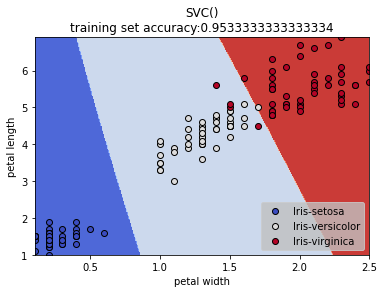

In [8]:
#default SVC
plot_decision_boundary(data,'petal width','petal length','species',SVC())

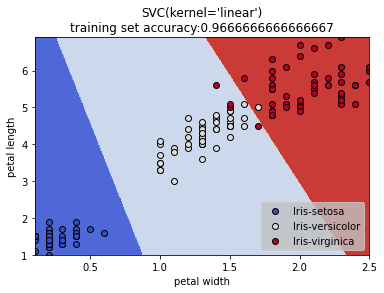

In [9]:
#linear kernel
plot_decision_boundary(data,'petal width','petal length','species',SVC(kernel='linear'))

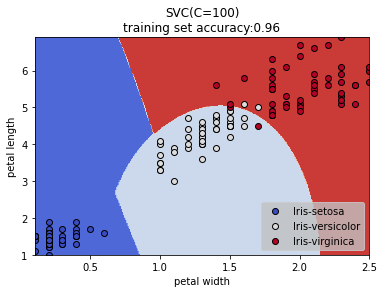

In [10]:
#larger value for C
plot_decision_boundary(data,'petal width','petal length','species',SVC(C=100))

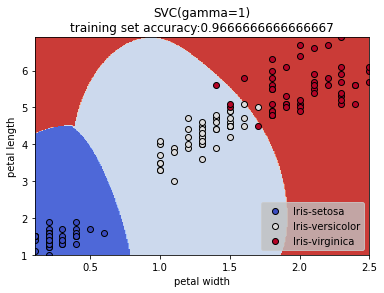

In [11]:
# set gamma
plot_decision_boundary(data,'petal width','petal length','species',SVC(gamma=1))

## Exercise #1:
Documentation: [`sklearn.svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

1. What are the parameters that we should consider tuning? Discuss.
2. Play around with changing these parameters and plotting the decision boundary.
3. Are the restuls what you expect? Why or why. not?
4. Can you get 100% accuracy?


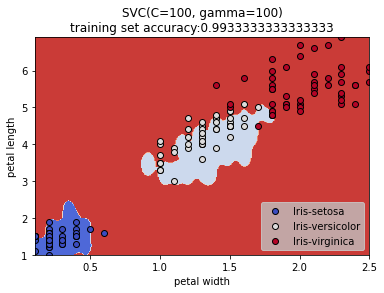

In [33]:
# exercise #1 code here
plot_decision_boundary(data,'petal width','petal length','species',SVC(C=100, gamma=100))

## Exercise #2:

Try using the supplied code to experiment with how other algorithms will be mapped. Are the decision boundaries what you expect?

- KNN
- Decision Trees
- Random Forests

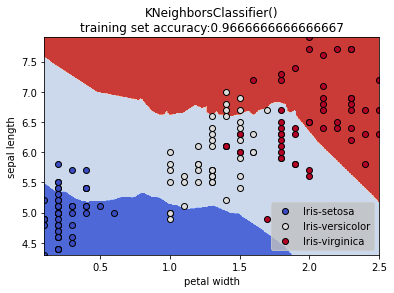

In [ ]:
# exercise #2 code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
plot_decision_boundary(data,'petal width','sepal length','species',KNeighborsClassifier())